In [579]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [580]:
os.listdir('images/')

['baby.jpg',
 'balls-pool.jpg',
 'balls.png',
 'different-fruits.jpg',
 'eagle.jpg',
 'grapes.png',
 'horse.jpg',
 'j.png',
 'opencv-logo.png']

#### Ex. O Objetivo é realizar um circulo em volta da Melancia 

Text(0.5, 1.0, 'Fruits')

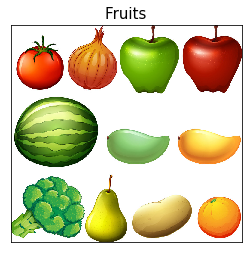

In [581]:
fruits = cv2.imread('images/different-fruits.jpg', cv2.IMREAD_COLOR)
fruits_gray = cv2.imread('images/different-fruits.jpg', cv2.IMREAD_GRAYSCALE)
fruits = cv2.cvtColor(fruits, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (6,4))
plt.imshow(fruits)
plt.xticks([])
plt.yticks([])
plt.title('Fruits', fontdict = {'fontsize' : 15} )

Text(0.5, 1.0, 'Fruits_gray')

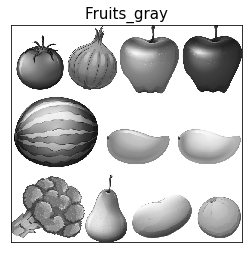

In [582]:
plt.imshow(fruits_gray, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Fruits_gray', fontdict = {'fontsize' : 15} )

In [583]:
limiar,img = cv2.threshold(fruits_gray,240,255, cv2.THRESH_BINARY_INV)

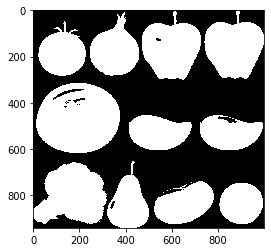

In [584]:
plt.imshow(img, cmap = 'gray')

In [585]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
img_close = cv2.morphologyEx(img,cv2.MORPH_CLOSE, kernel, iterations = 11)
img_erode = cv2.morphologyEx(img_close, cv2.MORPH_ERODE , kernel, iterations = 4)
#img_close = cv2.morphologyEx(img,cv2.MORPH_CLOSE, kernel, iterations = 7)


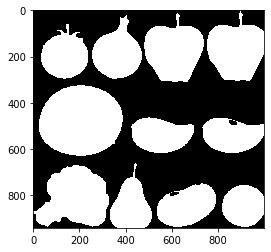

In [586]:
plt.imshow(img_close, cmap = 'gray')

In [587]:
contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [588]:
max_a = 0
for i in range(11):
    i_area = int(cv2.contourArea(contours[i]))
    max_area = int(cv2.contourArea(contours[max_a]))
    if i_area > max_area:
        max_a = i

In [589]:
x,y,dx,dy = cv2.boundingRect(contours[max_a])

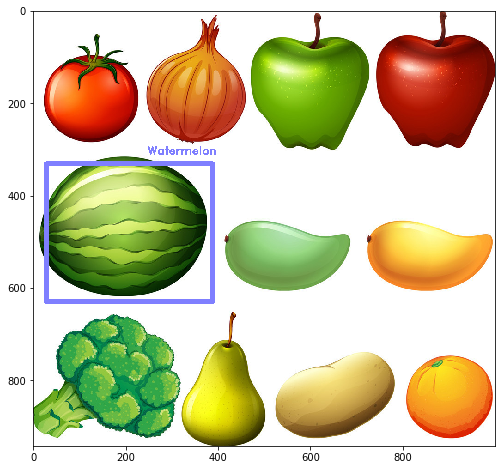

In [590]:
plt.figure(figsize = (10,8))
cv2.rectangle(fruits, (x,y), (x + dx, y + dy), (127,127,255), 10)
cv2.putText(fruits, 'Watermelon', (x + dx - 140, y - 20), cv2.FONT_HERSHEY_DUPLEX, 0.8, (127,127,255), 2)
plt.imshow(fruits)